<a href="https://colab.research.google.com/github/RohanRanshinge/causal-inference/blob/main/zero-to-hero-bsts/PART_I-Bayesian-Statistics/05.2-Gamma-Poisson-Conjugate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gamma - Poisson Conjugate

The Gamma-Poisson conjugate is another helpful shortcut we can use to calculate the posterior directly without having to integrate the denominator in Bayes theorem.




## Poisson Distribution

* The Poisson distribution models the probability of a specific number of events occurring within a fixed interval of time or space.   
* It is suitable for scenarios with rare, independent events occurring at a constant rate, such as plane crashes, traffic accidents, or insurance claims.

* It is defined by a single parameter: the mean (λ) which is also equal to its variance.   

The poisson distribution is given by the equation


$$P(X;λ) = \frac{λ^xe^{-λ}}{x!}$$

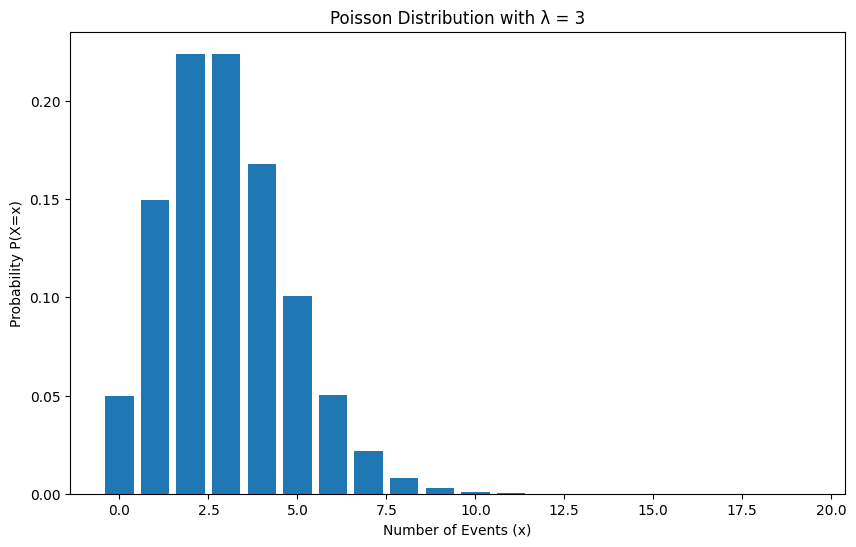

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define lambda
mu = 3

# Range of possible outcomes
x = np.arange(0, 20)

# Calculate Poisson probabilities using poisson.pmf
probabilities = poisson.pmf(x, mu)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x, probabilities)

# Add title and labels
plt.title(f"Poisson Distribution with λ = {mu}")
plt.xlabel("Number of Events (x)")
plt.ylabel("Probability P(X=x)")

# Display the plot
plt.show()

### Finding the average rate of plane crashes
The Poisson distribution is very interesting because it tells us that even rare events can occur with a surprisingly high frequency. For example, if the average rate of plane accidents were 3, it is not impossible to see 5, 6, or 7 accidents happen in any given year. While rare, it is not impossible as shown by the probability on the y-axis above.

Let’s see this with an example!  
If average rate = 3, what is the probability of observing 5 crashes in a year?
> $$P(X;λ) = \frac{λ^xe^{-λ}}{x!}$$  
 $$P(5;3) = \frac{3^5e^{-3}}{5!} = 0.1$$
Therefore, there’s a 10% chance of seeing 5 plane crashes in a year when the average rate = 3

In [ ]:
from scipy.stats import poisson

# Define lambda and x
lam = 3
x = 5

# Calculate probability using poisson.pmf
probability = poisson.pmf(x, lam)

print(f"The probability of X={x} for a Poisson distribution with lambda={lam} is: {probability:.2f}")

The probability of X=5 for a Poisson distribution with lambda=3 is: 0.10


### How is this related to Bayesian Statistics?
Let’s say you know an event - plane crash - follows a poisson distribution in any given year and you have also observed 5 plane crashes occur this year. However, you have no idea what the average rate of these rare events is (ie λ=?).

You have been asked what is the average rate of the event occurring?
Here λ=2,5,6,8 etc are all valid options. If you were to plot multiple poisson distributions with these lambda values you would notice they all contain 5 events occurring as a likely event.   
This means we need to consider all possible values of lambda and then check each hypothesis with our observation of 5 crashes.   
We want to know what is the likelihood of observing 5 events under each hypothesis for λ.




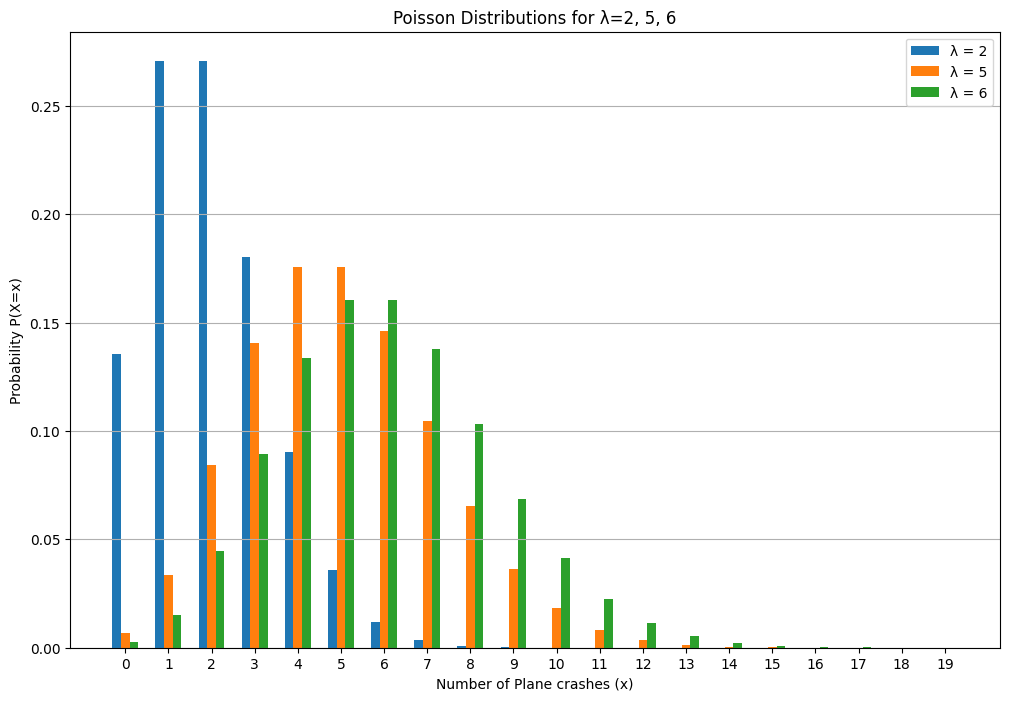

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Define different lambda values
lambdas = [2, 5, 6]

# Range of possible outcomes
x = np.arange(0, 20)

# Create a figure and axes
plt.figure(figsize=(12, 8))

# Plot Poisson distributions for each lambda using bar charts
bar_width = 0.2  # Adjust bar width as needed
for i, lam in enumerate(lambdas):
    probabilities = poisson.pmf(x, lam)
    plt.bar(x + i * bar_width, probabilities, bar_width, label=f'λ = {lam}')

# Add title and labels
plt.title("Poisson Distributions for λ=2, 5, 6")
plt.xlabel("Number of Plane crashes (x)")
plt.ylabel("Probability P(X=x)")
plt.legend()
plt.xticks(x + (len(lambdas) - 1) * bar_width / 2, x) # Adjust x-axis ticks
plt.grid(axis='y')

# Display the plot
plt.show()

Similar to previous situations, we need a prior that can be used with the poisson likelihood function to give us a posterior.

Now, lambda can be any value from 0 to infinity. Lambda can be any real number greater than 0 and thus the x-axis must be continuous.  To find the correct value of lambda we can use a distribution called the gamma distribution as a prior.

>*We **cannot** use a Beta distribution like earlier because a beta distribution shows all probabilities where the x axis is limited from 0 to 1. Lambda can take any value, thus we need something else.*


## Gamma Distribution

A Gamma distribution is a continuous probability distribution defined for non-negative values (from 0 to infinity) on the x-axis, with its probability density function represented on the y-axis.  
It is defined by two positive parameters, α (shape) and β (rate), and is commonly used as a prior distribution in Bayesian statistics, particularly for parameters that must be positive, such as rates in a Poisson distribution.
$$g(x;α,β) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
The function g takes inputs x, α and β. The random variable X must assume values greater than or equal to 0, while α and β must be positive. The function's output represents the probability density of x given α and β.

## How do we use Gamma distributions as priors?
Let's assume, the average rate of plane crashes from a Poisson distribution has a mean of 3. We can then use the following equation to find the α and β parameters for the Gamma priors: $μ =\frac{α}{β}$   
Since we know mean = 3 we can choose α = 3 and β = 1 (choosing α and β is subjective as long as the mean equation is correct).
We get a gamma distribution like so



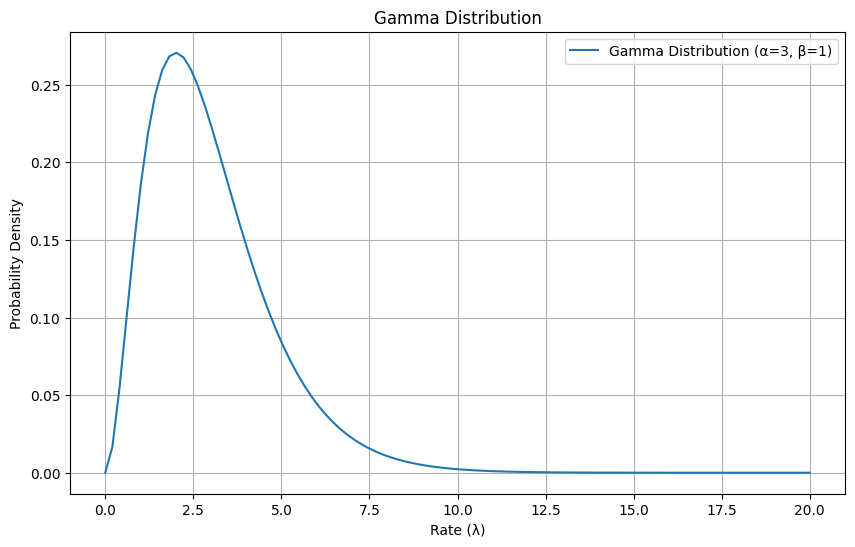

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define shape (alpha) and scale (beta) parameters for the Gamma distribution
alpha = 3  # Shape parameter
beta = 1   # Scale parameter (often denoted as theta or 1/beta in other contexts)

# Generate x values (representing the rate lambda, which must be non-negative)
x = np.linspace(0, 20, 100)

# Calculate the probability density function (PDF) of the Gamma distribution
pdf_values = gamma.pdf(x, a=alpha, scale=beta)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label=f'Gamma Distribution (α={alpha}, β={beta})')

# Add title and labels
plt.title("Gamma Distribution")
plt.xlabel("Rate (λ)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

We now observe 5 plane crashes in the real world. Using the earlier poisson distribution where λ = 3 , the likelihood of seeing 5 events is given by
$$P(X;λ) = \frac{λ^xe^{-λ}}{x!}= \frac{3^5e^{-3}}{5!} = 0.1$$
However, we want to find all possible  values and determine the probability of observing 5 events in a year. For a continuous variable, Bayes' theorem then becomes:
$$P(λ|data) = \frac{P(data|λ) * P(λ)}{∫P(data|λ)*P(λ)dλ}$$
where, P(λ) = prior    
P(data|λ) = likelihood  
The denominator here includes an integral which can be very difficult to solve.

Instead of solving this, we can use the Gamma-Poisson analytical shortcut to find the posterior. As stated earlier, the Gamma distribution is a conjugate prior to a Poisson distribution. When a Gamma prior is used with a Poisson likelihood, we get a Gamma posterior like so:  
$$α_{posterior} = α_{prior}+∑x_i$$
$$β_{posterior} = β_{prior}+n $$

If we saw 5 events in the year then x=5 and n=1
$$α_{posterior} = 3+5 = 8$$
$$β_{posterior} = 1+1 = 2$$

We can use these values to plot the gamma distribution of the posterior which includes all possible values of λ

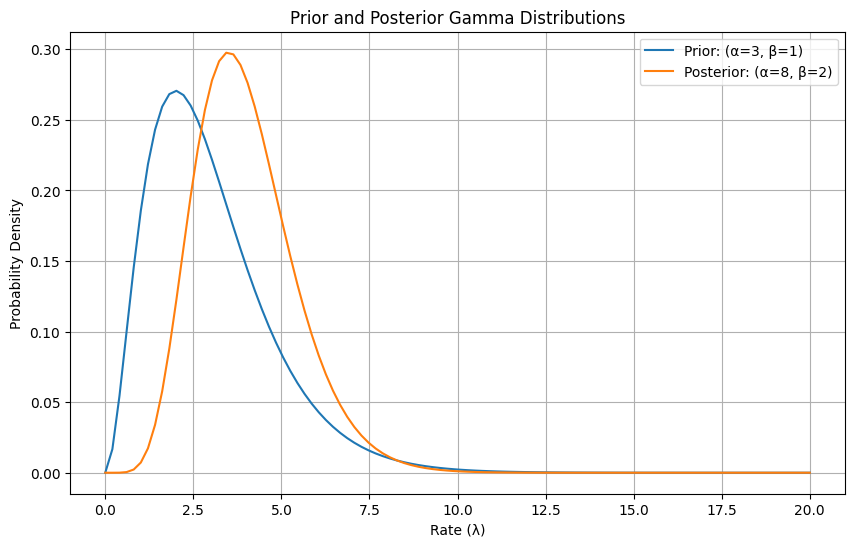

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define shape (alpha) and rate (beta) parameters
gamma_rate_params = [(3, 1), (8, 2)]

# Convert rate (beta) to scale (theta or scale) for scipy.stats.gamma
gamma_scale_params = [(alpha, 1/beta) for alpha, beta in gamma_rate_params]

# Generate x values (representing the rate lambda, which must be non-negative)
x = np.linspace(0, 20, 100)

# Create the plot
plt.figure(figsize=(10, 6))


# Plot each Gamma distribution using the scale parameter
for i, (alpha, scale_val) in enumerate(gamma_scale_params):
    pdf_values = gamma.pdf(x, a=alpha, scale=scale_val)
    label = f"Prior: (α={alpha}, β={1/scale_val:.0f})" if i == 0 else f"Posterior: (α={alpha}, β={1/scale_val:.0f})"
    plt.plot(x, pdf_values, label=label)

# Add title and labels
plt.title("Prior and Posterior Gamma Distributions")
plt.xlabel("Rate (λ)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

You can see above, based on our observation we updated our prior to form a new posterior. We used the gamma-poisson shortcut to easily find the posterior.   
As we get more data, this posterior becomes the new prior and we repeat the previous steps.   
For eg: lets say we get the following data in the following 3 years:

year | no. of accidents
:---:|:---:
1 | 3
2 | 4
3 | 7

The posterior can then be updated to reflect these observations like so
$$α_{posterior} = α_{prior}+∑x_i$$
$$β_{posterior} = β_{prior}+n $$

Therefore,  
$$α_{posterior} = 8+(3+4+7) = 22$$
$$β_{posterior} = 2+3 = 5$$

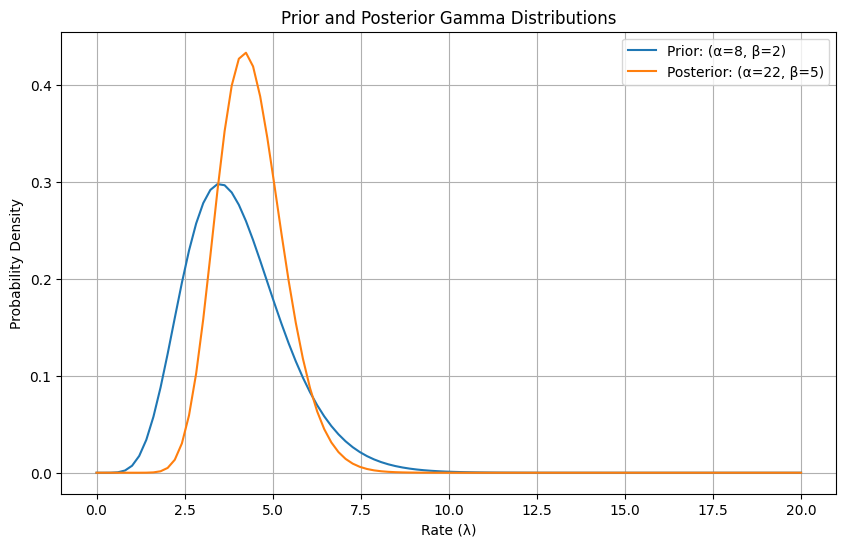

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Define shape (alpha) and rate (beta) parameters
gamma_rate_params = [(8, 2),(22,5)]

# Convert rate (beta) to scale (theta or scale) for scipy.stats.gamma
gamma_scale_params = [(alpha, 1/beta) for alpha, beta in gamma_rate_params]

# Generate x values (representing the rate lambda, which must be non-negative)
x = np.linspace(0, 20, 100)

# Create the plot
plt.figure(figsize=(10, 6))


# Plot each Gamma distribution using the scale parameter
for i, (alpha, scale_val) in enumerate(gamma_scale_params):
    pdf_values = gamma.pdf(x, a=alpha, scale=scale_val)
    label = f"Prior: (α={alpha}, β={1/scale_val:.0f})" if i == 0 else f"Posterior: (α={alpha}, β={1/scale_val:.0f})"
    plt.plot(x, pdf_values, label=label)

# Add title and labels
plt.title("Prior and Posterior Gamma Distributions")
plt.xlabel("Rate (λ)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

## Summary
* Gamma - Poisson conjugate priors are another set of conjugates that allow us to quickly find the posterior without having to deal with the integral in Bayes theorem.
* When dealing with a Poisson likelihood, using a Gamma distribution as a prior provides a convenient "shortcut" because the resulting posterior distribution is also a Gamma distribution.
* This simplification of the posterior avoids calculating complex integrals in the denominator.
* By starting with a Gamma prior that reflects our initial beliefs about the rate parameter (e.g., the average rate of plane crashes), and then updating it with observed data from a Poisson process (e.g., the number of observed plane crashes), we directly obtain a Gamma posterior that captures all possible values of the rate parameter and their probabilities.
